In [6]:
import numpy as np
import pandas as pd

from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
from sklearn.preprocessing import Normalizer
from sklearn import metrics
from sklearn.cluster import KMeans
from time import time
import matplotlib.pyplot as plt
import operator

%matplotlib inline

# Load data
n_clusters = 5
n_components=5
categories   = ['sci.space','comp.graphics', 'sci.med', 'rec.motorcycles', 'rec.sport.baseball']
dataset = fetch_20newsgroups(subset='train',  categories=categories, shuffle=True, random_state=42)


In [7]:
vectorizer  = TfidfVectorizer(stop_words = 'english',
                            max_features=1000, 
                              use_idf=True,
                            strip_accents='ascii')
X = vectorizer.fit_transform(dataset.data)
X.shape

(2966, 1000)

In [8]:
svd = TruncatedSVD(n_components=n_components,  algorithm='randomized',  n_iter=10, random_state=42)
svdX = svd.fit_transform(X)

nlzr = Normalizer(copy=False)
svdX = nlzr.fit_transform(svdX)

# Clustering
km = KMeans(n_clusters=n_clusters, init='k-means++', max_iter=100, n_init=4, verbose=False, random_state= 10)
km.fit(svdX)


KMeans(copy_x=True, init='k-means++', max_iter=100, n_clusters=5, n_init=4,
    n_jobs=1, precompute_distances='auto', random_state=10, tol=0.0001,
    verbose=False)

In [9]:
terms   = vectorizer.get_feature_names()

n_out = 10
n_weight = 5

for k in range(n_components):
    idx = {i:abs(j) for i, j in enumerate(svd.components_[k])}
    sorted_idx = sorted(idx.items(), key=operator.itemgetter(1), reverse=True)
    weight = np.mean([ item[1] for item in sorted_idx[0:n_weight] ])
    print("T%s)" % k, end =' ')
    for item in sorted_idx[0:n_out-1]:
        print( " %0.3f*%s"  % (item[1] , terms[item[0]]) , end=' ')
    print()


T0)  0.353*edu  0.239*com  0.152*article  0.144*writes  0.139*subject  0.136*organization  0.136*lines  0.119*posting  0.118*university 
T1)  0.410*pitt  0.387*geb  0.379*banks  0.378*gordon  0.218*cs  0.151*edu  0.132*chastity  0.132*n3jxp  0.132*skepticism 
T2)  0.443*space  0.407*nasa  0.255*gov  0.153*access  0.148*edu  0.129*digex  0.119*alaska  0.117*pat  0.116*moon 
T3)  0.571*com  0.433*edu  0.168*university  0.143*bike  0.139*access  0.129*space  0.116*ibm  0.112*digex  0.108*hp 
T4)  0.264*graphics  0.212*uk  0.200*ac  0.182*year  0.153*thanks  0.144*files  0.140*team  0.125*image  0.125*file 


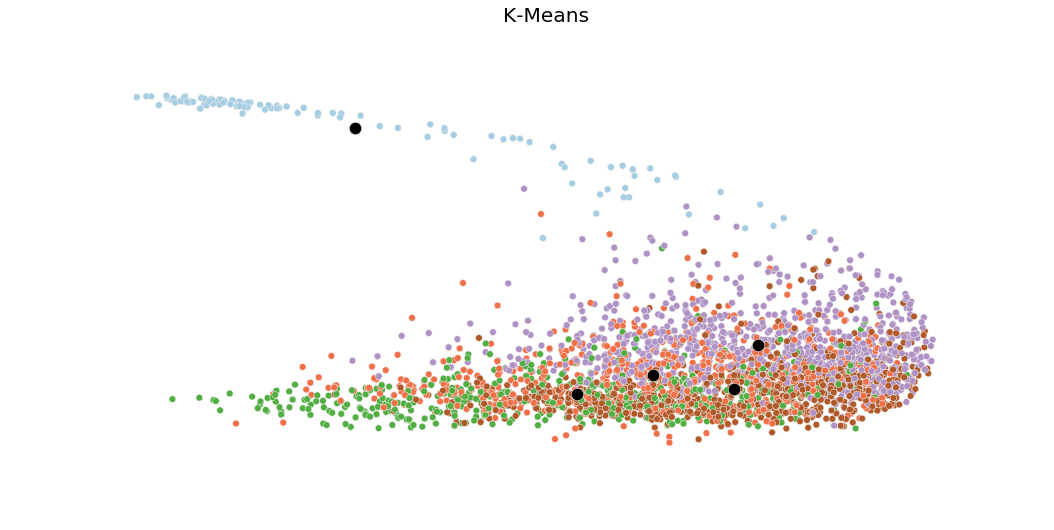

In [10]:
y_pred  = km.predict(svdX)
centers = km.cluster_centers_


def plot_clusters(svdX, y_pred, centers):
    plt.style.use('fivethirtyeight')
    f, ax1 = plt.subplots(1, 1, figsize=( 16, 8), facecolor='white')
    ax1.set_xlabel("")
    ax1.set_ylabel("")
    ax1.set_title("K-Means")
    # Only plots the first 2 dimensions of the svdX matrix
    ax1.scatter(svdX[:,0], svdX[:,1], c=y_pred, cmap=plt.cm.Paired, s=45)
    ax1.scatter(centers[:, 0], centers[:, 1], marker='o', c="black", alpha=1, s=150)
    ax1.axis('off')
    plt.show()


plot_clusters(svdX, y_pred, centers)
